In [1]:
import pandas as pd
import numpy as np

from pydataset import data

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 

### Load the tips dataset

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### Create a column named tip_percentage. This should be the tip amount divided by the total bill.


In [4]:
tips['tip_precentage']= round(tips.tip/tips.total_bill, 2)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_precentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.06
2,10.34,1.66,Male,No,Sun,Dinner,3,0.16
3,21.01,3.50,Male,No,Sun,Dinner,3,0.17
4,23.68,3.31,Male,No,Sun,Dinner,2,0.14
5,24.59,3.61,Female,No,Sun,Dinner,4,0.15


### Create a column named price_per_person. This should be the total bill divided by the party size.

In [6]:
tips.rename(columns={'size': 'party_size'}, inplace=True)

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,party_size,tip_precentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.06
2,10.34,1.66,Male,No,Sun,Dinner,3,0.16
3,21.01,3.50,Male,No,Sun,Dinner,3,0.17
4,23.68,3.31,Male,No,Sun,Dinner,2,0.14
5,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [8]:
tips['price_per_person']= round(tips.total_bill/tips.party_size, 2)

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,party_size,tip_precentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.06,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,0.16,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,0.17,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,0.14,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,0.15,6.15


### Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

tip precantage would be great but it requires data that we shouldnt have. 

### Use select k best and recursive feature elimination to select the top 2 features for predicting tip amount. What are they?

In [13]:


X = tips[['total_bill','party_size' , 'price_per_person']]
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7fb5aaca4dc0>)

In [15]:
X_train.columns[kbest.get_support()]

Index(['total_bill', 'party_size'], dtype='object')

Feature 0: 172.913650
Feature 1: 65.274770
Feature 2: 26.729285


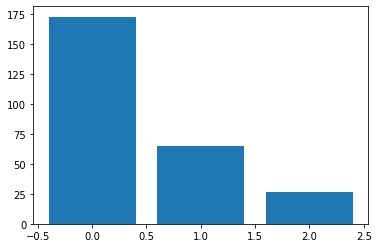

In [16]:
for i in range(len(kbest.scores_)):
    print('Feature %d: %f' % (i, kbest.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(kbest.scores_))], kbest.scores_)
plt.show()

### Use select k best and recursive feature elimination to select the top 2 features for predicting tip percentage. What are they?


In [28]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe.fit(X_train_scaled, y_train)
rfe.get_support()

array([ True, False,  True])

In [29]:
X_train.columns[rfe.get_support()]

Index(['total_bill', 'price_per_person'], dtype='object')

In [30]:
pd.Series(rfe.ranking_, index = X_train.columns)

total_bill          1
party_size          2
price_per_person    1
dtype: int64

### Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

RFE is run on everything. Whereas kbest are run independently. 

### Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.